<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/jimmyliao/BwAI2025/blob/main/04_Colab_Gemini_Image.ipynb"><img src="https://ai.google.dev/site-assets/images/docs/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

# Setup

Please ensure you have imported a Gemini API key from AI Studio.
You can do this directly in the Secrets tab on the left.

After doing so, please run the setup cell below.

In [2]:
!pip install -U -q "google"
!pip install -U -q "google.genai"

import os
from google.colab import userdata
from google.colab import drive
os.environ["GEMINI_API_KEY"] = userdata.get("GOOGLE_API_KEY")

# drive.mount("/content/drive")
# Please ensure that uploaded files are available in the AI Studio folder or change the working folder.
# os.chdir("/content/drive/MyDrive/Google AI Studio")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 950.2 kB/s eta 0:00:00


# Generated Code

In [5]:
import base64
import os
import mimetypes
from google import genai
from google.genai import types


def save_binary_file(file_name, data):
    f = open(file_name, "wb")
    f.write(data)
    f.close()


def generate():
    client = genai.Client(
        api_key=os.environ.get("GEMINI_API_KEY"),
    )

    model = "gemini-2.0-flash-exp-image-generation"
    contents = [
        types.Content(
            role="user",
            parts=[
                # types.Part.from_text(text="""INSERT_INPUT_HERE"""), # Default prompt, will be ignored
                types.Part.from_text(text="""Edit an image of Pikachu"""),
            ],
        ),
    ]
    generate_content_config = types.GenerateContentConfig(
        response_modalities=[
            "image",
            "text",
        ],
        response_mime_type="text/plain",
    )

    for chunk in client.models.generate_content_stream(
        model=model,
        contents=contents,
        config=generate_content_config,
    ):
        if not chunk.candidates or not chunk.candidates[0].content or not chunk.candidates[0].content.parts:
            continue
        if chunk.candidates[0].content.parts[0].inline_data:
            # file_name = "ENTER_FILE_NAME"
            file_name = "test"
            inline_data = chunk.candidates[0].content.parts[0].inline_data
            file_extension = mimetypes.guess_extension(inline_data.mime_type)
            save_binary_file(
                f"{file_name}{file_extension}", inline_data.data
            )
            print(
                "File of mime type"
                f" {inline_data.mime_type} saved"
                f"to: {file_name}"
            )
        else:
            print(chunk.text)

if __name__ == "__main__":
    generate()


File of mime type image/png savedto: test.png


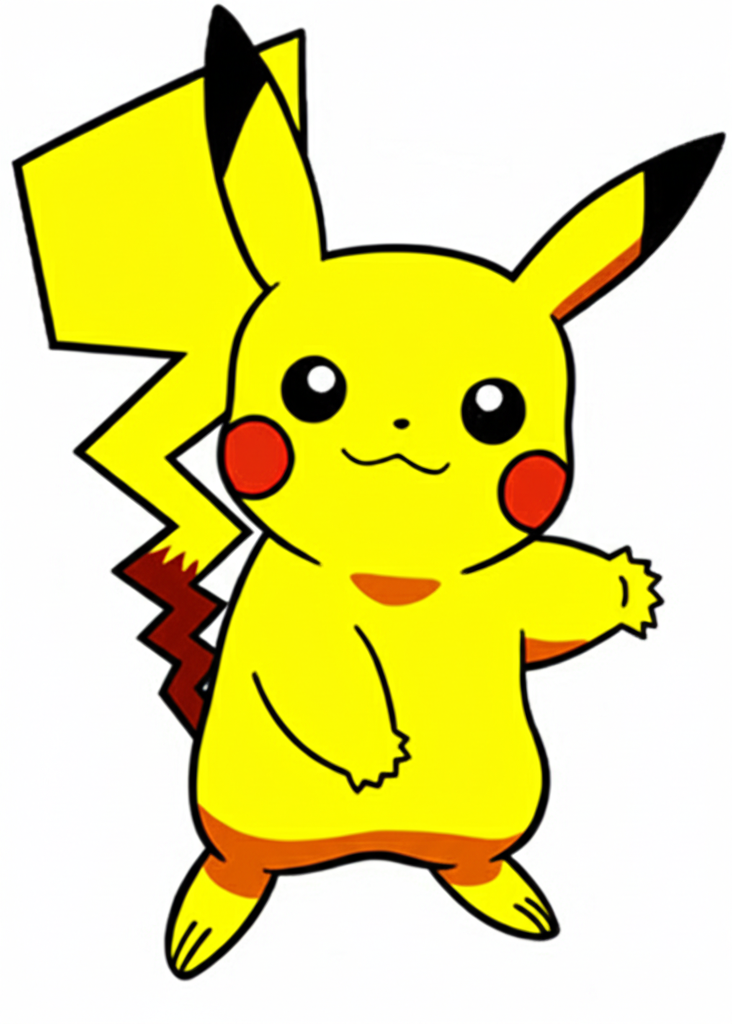

In [9]:
# open the file
from IPython.display import Image
Image(filename='test.png')